In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


f_off = -2.835503418452676e-06
tsamp = 17.986224128
plt_args = {
            'aspect':'auto',
            'origin':'lower',
            'rasterized':True,
            'interpolation':'nearest',
            'cmap':'viridis'
            }

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [3]:
!ls ../../data/S-band/

GBT_58014_68581_HIP77409_fine	  GBT_58210_39862_HIP105504_fine.h5
GBT_58014_68581_HIP77409_fine.h5  GBT_58210_40853_HIP106147_fine.h5
GBT_58014_69579_HIP77629_fine.h5  GBT_58307_26947_J1935+1616_fine
GBT_58202_60970_B0329+54_fine	  GBT_58452_79191_HIP115687_fine
GBT_58210_37805_HIP103730_fine	  used


In [4]:
df = pd.read_pickle("../../data/S-band/GBT_58202_60970_B0329+54_fine/info_df.pkl")
df = df.set_index("index")
df.sort_index()

,statistic,pvalue,block_num,freqs
index,,,,
0,2685.885559,0.0,0,1926.269531
100,2760.229739,0.0,0,1926.269252
200,2764.527462,0.0,0,1926.268972
300,2665.660303,0.0,0,1926.268693
400,2903.402023,0.0,0,1926.268414
...,...,...,...,...
322225232,2959.060700,0.0,10,1025.982633
322225332,2646.947256,0.0,10,1025.982354
322225432,3035.976492,0.0,10,1025.982074


In [5]:
df.describe()

,statistic,pvalue,block_num,freqs
count,48472.000000,48472.0,48472.000000,48472.000000
mean,3496.644086,0.0,3.742078,1571.065396
std,1224.913794,0.0,1.544051,134.462763
min,2048.000462,0.0,0.000000,1025.981516
25%,2531.208067,0.0,3.000000,1533.330635
50%,3130.583559,0.0,4.000000,1553.666269
75%,4169.047964,0.0,4.000000,1602.267525
max,9713.965759,0.0,10.000000,1926.269531


In [13]:
df.groupby("block_num").count()

,statistic,pvalue,freqs
block_num,,,
0,3765,3765,3765
1,12,12,12
2,714,714,714
3,9014,9014,9014
4,31053,31053,31053
5,34,34,34
6,72,72,72
7,3102,3102,3102
8,217,217,217


In [13]:
filtered_freqs = df["freqs"]
p_vals = df["pvalue"]
stats = df["statistic"]

/usr/local/lib/python3.6/dist-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


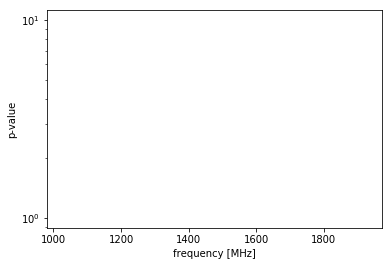

In [14]:
plt.figure()
plt.yscale("log")
plt.ylabel("p-value")
plt.xlabel("frequency [MHz]")
plt.plot(filtered_freqs, p_vals,'b,')

In [15]:
# plt.figure()
# plt.ylabel("statistic")
# plt.xlabel("frequency [MHz]")
# plt.plot(filtered_freqs, stats,'b,')

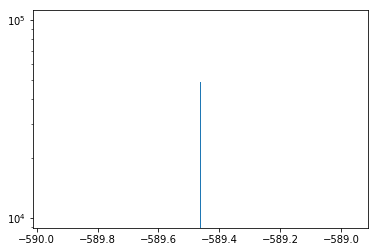

In [16]:
plt.figure()
plt.yscale("log")
n, bins, patches = plt.hist(np.log(p_vals+1e-256), bins=1000)

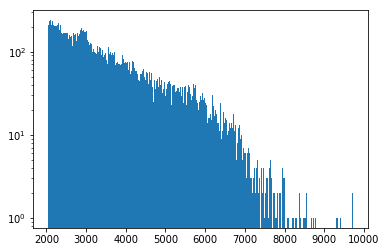

In [17]:
plt.figure()
plt.yscale("log")
n, bins, patches = plt.hist(stats, bins=1000)

In [ ]:
source_dir = "GBT_57532_09539_HIP56445_fine/"
filtered_dir = source_dir+"filtered_s/"
info_df = pd.read_pickle(source_dir+"info_df.pkl").astype({"index":int, "block_num":int})
info_df.set_index("index")
info_df.sort_index()

In [ ]:
filtered_freqs = info_df["freqs"]
p_vals = info_df["pvalue"]
stats = info_df["statistic"]

In [ ]:
num_bins = int(1000000//(1926.269531 - 1025.390648))
plt.figure()
plt.title(f"Histogram of Hits (bin size = {(1926.269531 - 1025.390648) / num_bins} MHz)")
plt.ylabel("number of hits")
plt.xlabel("frequency [MHz]")
n, bins, patches = plt.hist(filtered_freqs, bins=num_bins)

In [ ]:
plt.figure()
plt.yscale("log")
plt.ylabel("p-value")
plt.xlabel("frequency [MHz]")
plt.plot(filtered_freqs, p_vals,'b,')

In [ ]:
plt.figure()
plt.yscale("log")
n, bins, patches = plt.hist(np.log(p_vals+1e-256), bins=1000)

In [ ]:
# plt.figure()
# plt.yscale("log")
# n, bins, patches = plt.hist(stats, bins=1000)

In [ ]:
sample_size = 20
num_rows, num_cols = info_df.shape
step_size = num_rows//sample_size
start = np.random.randint(step_size)
sample_indexes = np.arange(start, num_rows, step_size)
samples = info_df.sort_values("pvalue").iloc[sample_indexes]
samples

In [ ]:
def load_plot_samples(n):
    rows, data_sections = [], []
    for ind in range(n):
        rows.append(samples.iloc[ind])
        i, s, p, block_num, start_freq = rows[-1]
        data_sections.append(np.load(f"{filtered_dir}{int(block_num)}/{int(i)}.npy"))

    def plot_sample(index):
        i, s, p, block_num, start_freq = rows[index]
        i, block_num = int(i), int(block_num)
        sub_freqs = np.arange(start_freq, start_freq+f_off*201, f_off)

        plt.figure(figsize=(10, 6))
        plt.title(f"Sample {index}, Index {i} in Block {block_num}, p-value={p:6E}")
        plt.yticks(np.arange(0, 16), list(map(lambda x: "%.2f" % x, np.arange(0, tsamp*18, tsamp))))
        plt.xticks(np.arange(0, 200, 49), list(map(lambda x: "%.5f" % x, sub_freqs[np.arange(0, 200, 49)])))
        plt.ylabel("time from obs start [s]")
        plt.xlabel("frequency [MHz]")
        plt.imshow(data_sections[index], **plt_args)
    return plot_sample
    
interact(load_plot_samples(20),index=widgets.IntSlider(min=0, max=20, step=1, value=5))

In [ ]:
def load_hist_samples(n):
    rows, data_sections = [], []
    for ind in range(n):
        rows.append(samples.iloc[ind])
        i, s, p, block_num, start_freq = rows[-1]
        data_sections.append(np.load(f"{filtered_dir}{int(block_num)}/{int(i)}.npy"))
    
    def plot_sample(index):
        i, s, p, block_num, start_freq = rows[index]
        i, block_num = int(i), int(block_num)
        sub_freqs = np.arange(start_freq, start_freq+f_off*201, f_off)

        plt.figure(figsize=(10, 6))
        plt.title(f"Sample {index}, Index {i} in Block {block_num}, p-value={p:6E}")
        plt.ylabel("Counts")
        plt.xlabel("Normalized Power")
        plt.hist(data_sections[index], bins=16)
    return plot_sample
interact_manual(load_hist_samples(20),index=widgets.IntSlider(min=0, max=9, step=1, value=5))

In [ ]:
# for Github where interactive doesn't render

i, s, p, block_num, start_freq = samples.iloc[6]
i, block_num = int(i), int(block_num)
data_section = np.load(f"{filtered_dir}{int(block_num)}/{int(i)}.npy")
sub_freqs = np.arange(start_freq, start_freq+f_off*201, f_off)

plt.figure(figsize=(10, 6))
plt.title(f"Index {i} in Block {block_num}, p-value={p:6E}")
plt.yticks(np.arange(0, 16), list(map(lambda x: "%.2f" % x, np.arange(0, tsamp*18, tsamp))))
plt.xticks(np.arange(0, 200, 49), list(map(lambda x: "%.5f" % x, sub_freqs[np.arange(0, 200, 49)])))
plt.ylabel("time from obs start [s]")
plt.xlabel("frequency [MHz]")
plt.imshow(data_section, **plt_args)

In [ ]:
# for Github where interactive doesn't render
i, s, p, block_num, start_freq = samples.iloc[6]
i, block_num = int(i), int(block_num)
sub_freqs = np.arange(start_freq, start_freq+f_off*201, f_off)

plt.figure(figsize=(10, 6))
plt.title(f"Index {i} in Block {block_num}, p-value={p:6E}")
plt.ylabel("Counts")
plt.xlabel("Normalized Power")
hist = plt.hist(data_section, bins=16)

In [ ]:
import os
from utils import *

In [ ]:
block_files = [os.path.join(filtered_dir+"/6", x) for x in os.listdir(filtered_dir+"/6")]

def view(ind):
    data = np.load(block_files[ind])
    plot_segment(data)
    
interact(view, ind=widgets.IntSlider(min=0, max=len(block_files), step=1, value=29))

In [ ]:
block_files2 = [os.path.join(source_dir+"filtered/4", x) for x in os.listdir(source_dir+"filtered/4")]

def view2(ind):
    data = np.load(block_files2[ind])
    plot_segment(data)
    
interact(view2, ind=widgets.IntSlider(min=0, max=len(block_files2)-1, step=1, value=0))